In [1]:
import pandas as pd
from matplotlib.ticker import MaxNLocator

## Data

In [2]:
# Read Data
df = pd.read_csv('../cases.csv')

# Cleansing
df['Staff/Student'] = df['Staff/Student'].str.capitalize()
df['Dept'] = df['Dept'].replace({r'[^\x00-\x7F]+':''}, regex=True)

# Add a 'date' column
date = pd.to_datetime([d[0] for d in df['Case Ref.'].str.split('-')])
df['Date'] = pd.Series(date)

df

,Case Ref.,Staff/Student,Dept,Hall Resident,Reported Status,Date of Last Presence on Campus,Place(s) Visited and Special follow-up actions,Date
0,20220207-1,Student,SN,N,Preliminary Positive,29/1/2022 0:00,VA324,2022-02-07
1,20220207-2,Student,APSS,N,Confirmed,20/1/2022 0:00,R406,2022-02-07
2,20220207-3,Student,ABCT,N,Confirmed,25/1/2022 0:00,Y604,2022-02-07
3,20220207-4,Student,SN,N,Confirmed,27/1/2022 0:00,N.A.,2022-02-07
4,20220208-1,Student,LSGI,N,Positive (taking rapid antigen test),7/2/2022 0:00,ZN604,2022-02-08
...,...,...,...,...,...,...,...,...
218,20220223-30,Student,COMP,Y,Positive (RAT),15-Feb-22,VA Canteen,2022-02-23
219,20220223-31,Student,FB,Y,Positive (RAT),20-Feb-22,Library,2022-02-23
220,20220223-32,Student,ABCT,Y,Positive (RAT),22-Feb-22,"W707, Y842, Y1308A",2022-02-23
221,20220223-33,Student,AMA,Y,Positive (RAT),11-Feb-22,N.A.,2022-02-23


## Utility Functions

In [3]:
# save a pandas plot
def save(ax, name: str):
    ax.get_figure().savefig('../plots/' + name)

## Daily Cases

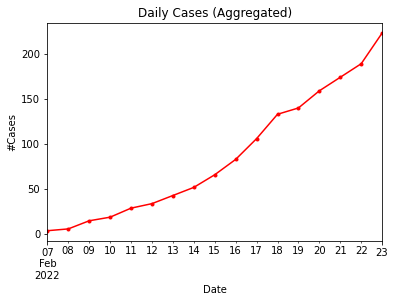

In [4]:
case_by_day = df.groupby(['Date'])['Case Ref.'].count().cumsum()
args = {
    'title': "Daily Cases (Aggregated)",
    'kind': 'line',
    'style': '.-',
    'xlabel': 'Date',
    'ylabel': '#Cases',
    'color': ['r']
}

ax_case_by_day = case_by_day.plot(**args)
save(ax_case_by_day, "daily.png")

## Comparison among Groups

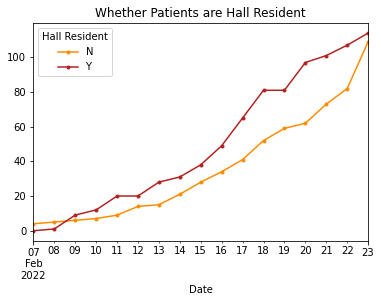

In [5]:
hall = (df.groupby(['Date', 'Hall Resident'])
        .count().unstack()['Case Ref.']
        .fillna(0).cumsum()
        .plot(kind='line', style='.-', color=['darkorange', 'firebrick'], title='Whether Patients are Hall Resident'))

save(hall, 'hall.png')

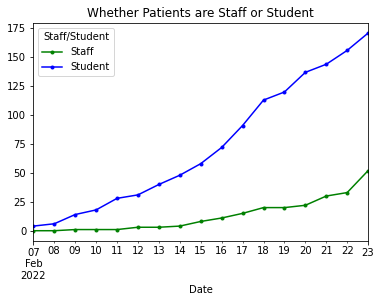

In [6]:
staff = (df.groupby(['Date', 'Staff/Student']).count().unstack()['Case Ref.']
         .fillna(0).cumsum()
         .plot(kind='line', style='.-', color=['g', 'b'], title='Whether Patients are Staff or Student'))
save(staff, 'staff.png')

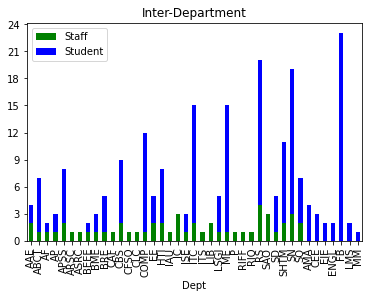

In [7]:
dsc = df[['Dept', 'Staff/Student', 'Case Ref.']]
staff = dsc[dsc['Staff/Student'] == 'Staff'][['Dept', 'Case Ref.']].groupby('Dept').count()
student = dsc[dsc['Staff/Student'] == 'Student'][['Dept', 'Case Ref.']].groupby('Dept').count()

ax = pd.concat([staff, student], axis=1).set_axis(['Staff', 'Student'], axis=1).fillna(0).plot(kind='bar', stacked=True, color = ['g', 'b'], title='Inter-Department')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # integer y ticks

save(ax, 'dept.png')